In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

### Loading the Data Set
Preview: this is how the data set looks before cleaning

In [5]:
Data = pd.read_csv('adult.csv')
Data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


### Cleaning Data
> Changing the following categorical variable from string data type to numeric type:
'marital.status', 'occupation', 'race', 'sex'                                                                            
> Replacing '?' (missing values) with 'NaN' and then dropping them                                                              
> Changing the names of some of the variables: variables such 'education.num' are not read                                      
> Adding new columns required for analysis purpose

In [6]:
#define strings into numeric code
class_workclass = {'Federal-gov': 1,'Local-gov': 2,'Private': 3,'Self-emp-not-inc': 4,'State-gov': 5,'Without-pay': 6}
class_educ = {'Prof-school':1,'1st-4th':2,'5th-6th':3,'7th-8th':4,'9th':5,'10th':6,'11th':7,'12th':8,'HS-grad':9,
                  'Preschool':10,'Assoc-voc':11,'Assoc-acdm':12,'Some-college':13,'Bachelors':14,'Masters':15,'Doctorate':16}
class_married = {'Never-married':1,'Married-civ-spouse':2,'Married-AF-spouse':3,'Married-spouse-absent':4,'Separated':5,
                 'Widowed':6,'Divorced':7}
class_occupation = {'Tech-support':1,'Craft-repair':2,'Other-service':3,'Sales':4,'Exec-managerial':5,'Prof-specialty':6,
                 'Handlers-cleaners':7,'Machine-op-inspct':8,'Adm-clerical':9,'Farming-fishing':10,'Transport-moving':11,
                 'Priv-house-serv':12,'Protective-serv':13,'Armed-Forces':14}
class_relation = {'Wife':1, 'Own-child':2, 'Husband':3, 'Not-in-family':4, 'Other-relative':5,'Unmarried':6}
class_race = {'White':1,'Asian-Pac-Islander':2,'Amer-Indian-Eskimo':3,'Other':4,'Black':5}
class_sex = {'Female':1,'Male':2}
class_country = {'United-States':1,'Cambodia':2, 'England':3,'Puerto-Rico':4,'Canada':5, 'Germany':6,'Outlying-US(Guam-USVI-etc)':7,
                'India':8, 'Japan':9,'Greece':10, 'South':11, 'China':12, 'Cuba':13, 'Iran':14, 'Honduras':15, 'Philippines':16,
                'Italy':17, 'Poland':18, 'Jamaica':19, 'Vietnam':20,'Mexico':21,'Portugal':22,'Ireland':23, 'France':24, 'Dominican-Republic':25,
                'Laos':26, 'Ecuador':27, 'Taiwan':28, 'Haiti':29, 'Columbia':30, 'Hungary':31, 'Guatemala':32, 'Nicaragua':33, 'Scotland':34,
                'Thailand':35, 'Yugoslavia':36, 'El-Salvador':37, 'Trinadad&Tobago':38, 'Peru':39, 'Hong':40, 'Holand-Netherlands':41}

Data['workclass']=Data['workclass'].map(class_workclass)
Data['education']=Data['education'].map(class_educ)
Data['marital.status']=Data['marital.status'].map(class_married)
Data['occupation'] = Data['occupation'].map(class_occupation)
Data['relationship'] = Data['relationship'].map(class_relation)
Data['race'] = Data['race'].map(class_race)
Data['sex'] = Data['sex'].map(class_sex)
Data['native.country'] = Data['native.country'].map(class_country)

#Dropping missing values (NaN)
Data = Data.replace(to_replace='?', value = np.NaN)
Data = Data.dropna()

#Changing the names of the variables to make then compatible with Python
Data = Data.rename(columns={'age':'Age', 'workclass':'Work Class', 'fnlwgt':'Final Weight','education':'Education','education.num': 'Years of Schooling', 'marital.status':'Marital Status', 'occupation':'Occupation', 'relationship':'Relationship', 'race':'Race', 'sex':'Sex', 'capital.gain':'Capital Gain', 'capital.loss':'Capital Loss', 'hours.per.week':'Hours Worked per Week', 'native.country':'Native Country', 'income':'Income'})

#Adding a new column 'Income(Coded)'
Data['Income (Coded)'] = Data['Income']
Data['Income (Coded)'].replace({'<=50K':0, '>50K':1}, inplace=True)
Data.head(10)

,Age,Work Class,Final Weight,Education,Years of Schooling,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours Worked per Week,Native Country,Income,Income (Coded)
1,82,3.0,132870,9,9,6,5.0,4,1,1,0,4356,18,1.0,<=50K,0
3,54,3.0,140359,4,4,7,8.0,6,1,1,0,3900,40,1.0,<=50K,0
4,41,3.0,264663,13,10,5,6.0,2,1,1,0,3900,40,1.0,<=50K,0
5,34,3.0,216864,9,9,7,3.0,6,1,1,0,3770,45,1.0,<=50K,0
6,38,3.0,150601,6,6,5,9.0,6,1,2,0,3770,40,1.0,<=50K,0
7,74,5.0,88638,16,16,1,6.0,5,1,1,0,3683,20,1.0,>50K,1
8,68,1.0,422013,9,9,7,6.0,4,1,1,0,3683,40,1.0,<=50K,0
10,45,3.0,172274,16,16,7,6.0,6,5,1,0,3004,35,1.0,>50K,1
11,38,4.0,164526,1,15,1,6.0,4,1,2,0,2824,45,1.0,>50K,1
12,52,3.0,129177,14,13,6,3.0,4,1,1,0,2824,20,1.0,>50K,1


### Subsetting data into Two Parts: Income above 50K | Income below 50K


In [7]:
Data_Income_below = Data[Data['Income']=='<=50K']
Data_Income_above = Data[Data['Income']=='>50K']

## Exploring Data

<IPython.core.display.Javascript object>


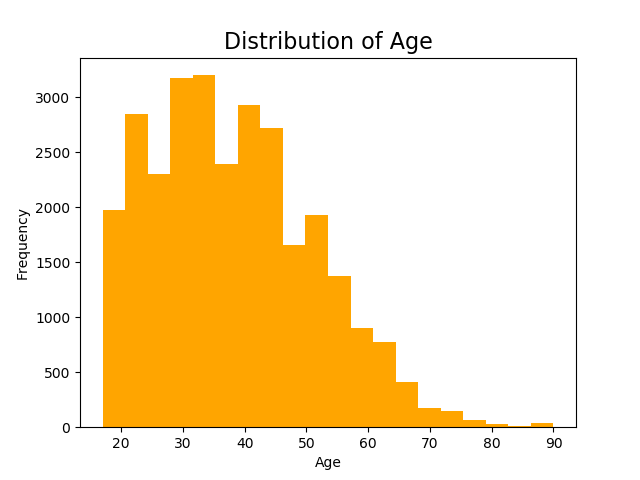

Text(0, 0.5, 'Frequency')

In [8]:
fig, ax1 = plt.subplots()
ax1.hist(Data['Age'], color = 'orange', alpha=1, bins=20)
ax1.set_title('Distribution of Age', size=16)
plt.xlabel('Age')
plt.ylabel('Frequency')

<IPython.core.display.Javascript object>


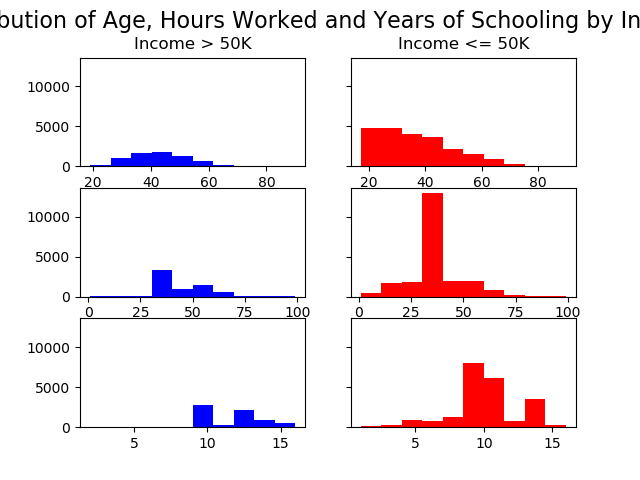

(array([ 189.,  274.,  937.,  745., 1323., 8069., 6177.,  735., 3508.,
         223.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

In [9]:
fig, ((Age11, Age12), (Hr21, Hr22), (YSc31, YSc32)) = plt.subplots(3, 2, sharey=True)
fig.suptitle('Distribution of Age, Hours Worked and Years of Schooling by Income', size=16)

#Distribution of 'Age'
Age11.hist(Data_Income_above['Age'], color='blue')
Age11.set_title('Income > 50K')
Age12.hist(Data_Income_below['Age'], color='red')
Age12.set_title('Income <= 50K')

#Distribution of 'Hours Worked per Week'
Hr21.hist(Data_Income_above['Hours Worked per Week'], color='blue')
Hr22.hist(Data_Income_below['Hours Worked per Week'], color='red')

#Distribution of 'Years of Schooling'
YSc31.hist(Data_Income_above['Years of Schooling'], color='blue')
YSc32.hist(Data_Income_below['Years of Schooling'], color='red')

In [10]:
Data_Income_below['Occupation'].value_counts()

9.0     3203
3.0     3059
2.0     3058
4.0     2488
6.0     2189
5.0     1916
8.0     1713
7.0     1265
11.0    1237
10.0     838
1.0      633
13.0     431
12.0     142
14.0       8
Name: Occupation, dtype: int64

In [11]:
x_Occ_below = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
y_Occ_below = np.array([633, 3058, 3059, 2488, 1916, 2189, 1265, 1713, 3203, 838, 1237, 142, 431, 8])

In [12]:
Data_Income_above['Occupation'].value_counts()

6.0     1692
5.0     1691
2.0      873
4.0      815
9.0      490
11.0     309
1.0      276
8.0      243
13.0     208
3.0      126
10.0     100
7.0       83
12.0       1
14.0       1
Name: Occupation, dtype: int64

In [13]:
x_Occ_above = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14])
y_Occ_above = np.array([276,873,126,815,1691,1692,83,243,490,100,309,1,208,1])

In [14]:
Data_Income_below['Marital Status'].value_counts()

1    9150
2    7408
7    3688
5     858
6     730
4     335
3      11
Name: Marital Status, dtype: int64

In [15]:
x_MS_below = np.array([1,2,3,4,5,6,7])
y_MS_below = np.array([9150, 7408,11,335,858,730,3688])

In [16]:
Data_Income_above['Marital Status'].value_counts()

2    5855
1     454
7     428
6      69
5      61
4      31
3      10
Name: Marital Status, dtype: int64

In [17]:
x_MS_above = np.array([1,2,3,4,5,6,7])
y_MS_above = np.array([454,5855,10,31,61,69,428])

<IPython.core.display.Javascript object>


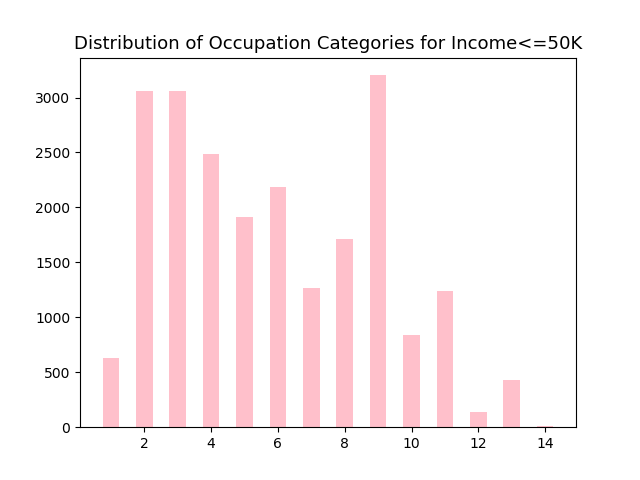

Text(0.5, 1.0, 'Distribution of Occupation Categories for Income<=50K')

In [18]:
plt.figure()
plt.bar(x_Occ_below, y_Occ_below, width = 0.5, color='pink')
plt.title('Distribution of Occupation Categories for Income<=50K', size=13)

<IPython.core.display.Javascript object>


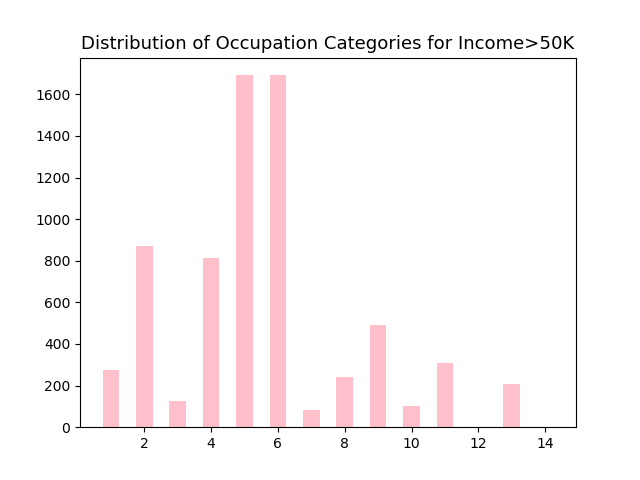

Text(0.5, 1.0, 'Distribution of Occupation Categories for Income>50K')

In [19]:
plt.figure()
plt.bar(x_Occ_above, y_Occ_above, width = 0.5, color='pink')
plt.title('Distribution of Occupation Categories for Income>50K', size=13)

<IPython.core.display.Javascript object>


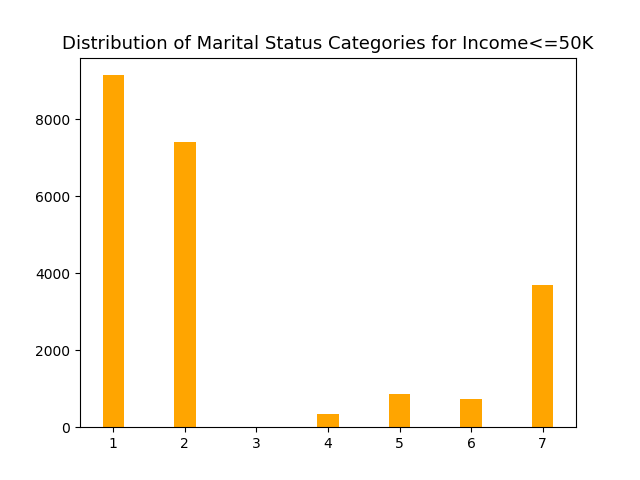

Text(0.5, 1.0, 'Distribution of Marital Status Categories for Income<=50K')

In [20]:
plt.figure()
plt.bar(x_MS_below, y_MS_below, width = 0.3, color='orange')
plt.title('Distribution of Marital Status Categories for Income<=50K', size=13)

<IPython.core.display.Javascript object>


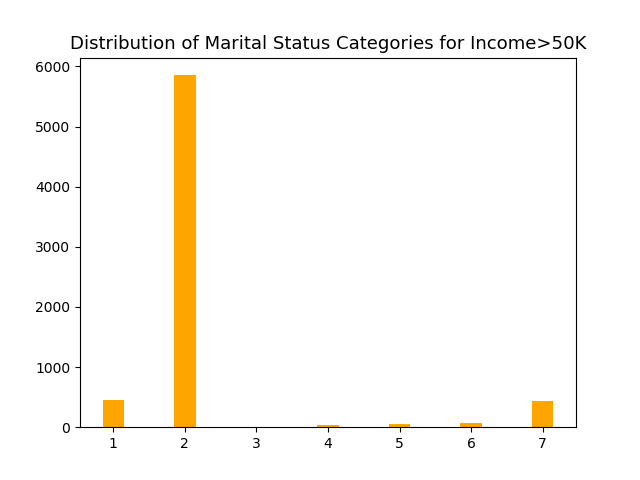

Text(0.5, 1.0, 'Distribution of Marital Status Categories for Income>50K')

In [21]:
plt.figure()
plt.bar(x_MS_above, y_MS_above, width = 0.3, color='orange')
plt.title('Distribution of Marital Status Categories for Income>50K', size=13)

In [34]:
X = Data[['Age', 'Work Class', 'Years of Schooling', 
          'Marital Status', 'Occupation','Relationship',
          'Race', 'Sex', 'Hours Worked per Week']]
y = Data['Income (Coded)']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

<IPython.core.display.Javascript object>


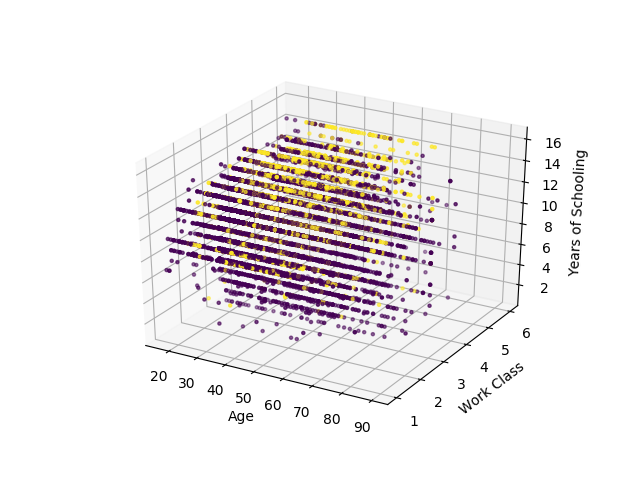

In [36]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['Age'], X_train['Work Class'], X_train['Years of Schooling'],c = y_train, marker = 'o', s=5)
ax.set_xlabel('Age')
ax.set_ylabel('Work Class')
ax.set_zlabel('Years of Schooling')
plt.show()

<IPython.core.display.Javascript object>


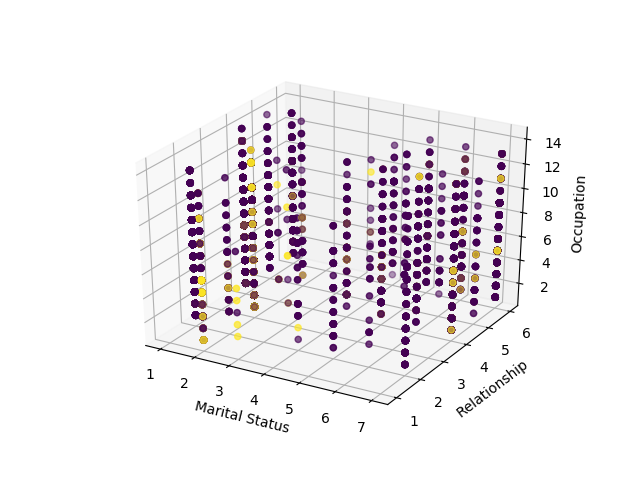

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['Marital Status'], X_train['Relationship'], X_train['Occupation'],c = y_train, marker = 'o', s=20)
ax.set_xlabel('Marital Status')
ax.set_ylabel('Relationship')
ax.set_zlabel('Occupation')
plt.show()

<IPython.core.display.Javascript object>


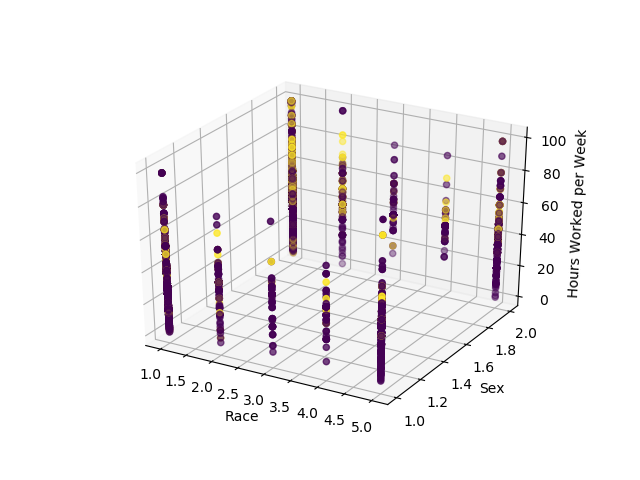

In [25]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['Race'],X_train['Sex'],X_train['Hours Worked per Week'],c = y_train, marker = 'o', s=20)
ax.set_xlabel('Race')
ax.set_ylabel('Sex')
ax.set_zlabel('Hours Worked per Week')
plt.show()

## Predicting if an Individual is likely to have an Income Above or Below 50K

#### Creating Train-Test Split

In [26]:
X = Data[['Age', 'Work Class', 'Years of Schooling', 'Marital Status', 'Occupation', 'Race', 'Sex', 'Hours Worked per Week']]
y = Data['Income']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#### Creating Classifier Object

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

#### Training the Classifier using Train data

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

#### Checking the Accuracy of the Classifier for Future Data

In [32]:
#score is the fraction of test set items, whose true label was correctly predicted by the classifier
knn.score(X_test, y_test)

0.8025302530253026

### Classifying/Predicting Income of Previously Unseen New Individuals

### Let's see if a person will have an income <=50K or >50K if 
> 'He' is 21 year old  
> with 10 years of schooling                                                                                                   
> marital status- 'Separated'  
> with occupation "Crafts-repair'  
> work class- 'Without-pay'                                                                                                     
> works 30 hours a week    
> Race- 'Black'

In [149]:
Income_prediction = knn.predict([[21, 6, 10, 5, 2, 5, 2, 30]])
[Income_prediction[0]]

['<=50K']

### Let's see if a person will have an income <=50K or >50K if
> 'She' is 40 year old                                                                                                         
> with 16 years of schooling                                                                                                   
> marital status- 'Married-civ-spouse'                      
> with occupation 'Tech-support'                    
> work class- 'Federal-gov'                     
> works 40 hours a week  
> Race- 'White'

In [150]:
Income_prediction = knn.predict([[40, 1, 16, 2, 1, 1, 1, 40]])
[Income_prediction[0]]

['>50K']

### Let's see if a person will have an income <=50K or >50K if 
> 'He' is 55 year old  
> with 18 years of schooling                                                                                                   
> marital status- 'Widowed'  
> with occupation 'Exec-managerial'  
> work class- 'Private'                                                                                                     
> works 30 hours a week   
> Race- 'Asia-Pac-Islander'

In [151]:
Income_prediction = knn.predict([[55, 3, 18, 6, 5, 2, 2, 30]])
[Income_prediction[0]]

['>50K']